load 30m poloniex data

In [1]:
cd ..

/home/daniel/python/rl-portfolio-management


In [2]:
# plotting
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (11.5,6)
plt.style.use('ggplot')

# numeric
import numpy as np
from numpy import random
import pandas as pd

import glob

from tqdm import tqdm_notebook as tqdm

import os, json

In [3]:
dfs=[]
for infile in glob.glob('./data/bloomberg_data_15min/*.csv'):
    df = pd.read_csv(infile)
    
    # date
    df.index=pd.to_datetime(df.date*1e9)
    del df['date']
    # just the cols from jiang 2017
    df = df[['close','high','low','open']]
    df=df.resample('30T').first()
    
    # name cols
    name = os.path.splitext(os.path.basename(infile))[0]
#     df.columns = ['%s|%s'%(name,col) for col in df.columns]
    df.name=name
    
    dfs.append(df)

In [4]:
# sort by time lengths
dfs.sort(key=lambda x:len(x), reverse=True)
[(df.name,df.index[0]) for df in dfs]

[('csco', Timestamp('2018-03-23 13:30:00', freq='30T')),
 ('trv', Timestamp('2018-03-23 13:30:00', freq='30T')),
 ('utx', Timestamp('2018-03-23 13:30:00', freq='30T')),
 ('jpm', Timestamp('2018-03-23 13:30:00', freq='30T')),
 ('msft', Timestamp('2018-03-23 13:30:00', freq='30T')),
 ('ge', Timestamp('2018-03-23 13:30:00', freq='30T')),
 ('gs', Timestamp('2018-03-23 13:30:00', freq='30T')),
 ('ibm', Timestamp('2018-03-23 13:30:00', freq='30T')),
 ('axp', Timestamp('2018-03-23 13:30:00', freq='30T')),
 ('cat', Timestamp('2018-03-23 13:30:00', freq='30T')),
 ('aapl', Timestamp('2018-03-23 13:30:00', freq='30T')),
 ('intc', Timestamp('2018-03-23 13:30:00', freq='30T')),
 ('ba', Timestamp('2018-03-23 13:30:00', freq='30T')),
 ('v', Timestamp('2018-03-23 13:30:00', freq='30T')),
 ('mmm', Timestamp('2018-03-23 13:30:00', freq='30T')),
 ('djindu', Timestamp('2018-03-23 18:30:00', freq='30T'))]

In [5]:
# # insert a fake one, the price of one bitcoin in bitcoin = 1
# df=dfs[0].copy()
# df[:]=1
# df.name='BTCBTC'
# dfs.insert(0,df)

In [6]:
# crop to ones with more data
dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2018-12-12')]
# dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2014-08-15')]
# dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2015-08-09')]

# also only ones that are in BTC
#dfs1= [df for df in dfs1 if df.name.endswith('BTC')]
print([str(min(df.index)) for df in dfs1])

['2018-03-23 13:30:00', '2018-03-23 13:30:00', '2018-03-23 13:30:00', '2018-03-23 13:30:00', '2018-03-23 13:30:00', '2018-03-23 13:30:00', '2018-03-23 13:30:00', '2018-03-23 13:30:00', '2018-03-23 13:30:00', '2018-03-23 13:30:00', '2018-03-23 13:30:00', '2018-03-23 13:30:00', '2018-03-23 13:30:00', '2018-03-23 13:30:00', '2018-03-23 13:30:00', '2018-03-23 18:30:00']


In [7]:
# something is wrong with DOGEBTC when I plot it, it has jumps and flat intervals everywhere, I think it might be a rounding error in the data
blacklist = ['DOGEBTC', 'XRPBTC']
dfs1 = [d for d in dfs1 if d.name not in blacklist]

In [8]:
print('restricted from', len(dfs), 'to', len(dfs1))

restricted from 16 to 16


In [9]:
# reindex
mi = dfs1[0].index.copy()
for i in range(len(dfs1)):
    name = dfs1[i].name
    dfs[i]=dfs1[i].reindex(mi, method='pad')
    dfs[i][np.isnan(dfs[i])]=0
    dfs[i].name = name

In [10]:
# concat
df = pd.concat(dfs1, axis=1, keys=[df.name for df in dfs1], names=['Stock','Price'])
df

Stock                 csco                             trv                  \
Price                close    high     low    open   close    high     low   
date                                                                         
2018-03-23 13:30:00  43.50  43.790  43.490  43.710  137.93  138.65  137.83   
2018-03-23 14:00:00  43.39  43.630  43.380  43.510  137.23  138.12  137.23   
2018-03-23 14:30:00  43.48  43.510  43.370  43.410  137.18  137.43  136.98   
2018-03-23 15:00:00  43.47  43.640  43.455  43.620  137.29  137.58  137.19   
2018-03-23 15:30:00  43.25  43.520  43.250  43.460  136.69  137.14  136.69   
2018-03-23 16:00:00  43.17  43.280  43.050  43.050  136.58  136.62  136.16   
2018-03-23 16:30:00  43.15  43.375  43.150  43.365  136.80  136.92  136.74   
2018-03-23 17:00:00  43.46  43.510  43.090  43.150  137.23  137.34  136.70   
2018-03-23 17:30:00  43.56  43.640  43.500  43.570  137.39  137.85  137.39   
2018-03-23 18:00:00  43.54  43.800  43.540  43.740  137.62  137.96  137.62   
2018-03-23 18:30:00  43.37  43.480  43.300  43.470  137.36  137.60  137.36   
2018-03-23 19:00:00  43.02  43.090  42.840  43.060  136.20  136.72  135.91   
2018-03-23 19:30:00  42.77  42.930  42.740  42.920  135.50  136.06  135.50   
2018-03-23 20:00:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-23 20:30:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-23 21:00:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-23 21:30:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-23 22:00:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-23 22:30:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-23 23:00:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-23 23:30:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-24 00:00:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-24 00:30:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-24 01:00:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-24 01:30:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-24 02:00:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-24 02:30:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-24 03:00:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-24 03:30:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-24 04:00:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...                    ...     ...     ...     ...     ...     ...     ...   
2018-04-23 00:30:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-23 01:00:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-23 01:30:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-23 02:00:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-23 02:30:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-23 03:00:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-23 03:30:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-23 04:00:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-23 04:30:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-23 05:00:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-23 05:30:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-23 06:00:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-23 06:30:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-23 07:00:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-23 07:30:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-23 08:00:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-23 08:30:00    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-23 09:00:00   

In [11]:
# crop to when they all exist
print('cropped from', len(df))
t=max([min(df1.index) for df1 in dfs1])
df=df[df.index>t]
print('to',len(df))

cropped from 1492
to 1481


In [12]:
# fill in na's
#df = df.fillna(method="pad")

#Dropping na's instead
df = df.dropna()

# replace rest
df.replace(np.nan, 0, inplace=True)
# df.unstack()
df=df.astype(np.float32)
df

Stock                     csco                                          trv  \
Price                    close       high        low       open       close   
date                                                                          
2018-03-23 19:00:00  43.020000  43.090000  42.840000  43.060001  136.199997   
2018-03-23 19:30:00  42.770000  42.930000  42.740002  42.919998  135.500000   
2018-03-26 14:30:00  43.360001  43.445000  43.110001  43.160000  137.110001   
2018-03-26 15:00:00  43.389999  43.560001  43.375000  43.509998  137.050003   
2018-03-26 15:30:00  43.189999  43.334999  43.130001  43.334999  136.539993   
2018-03-26 16:00:00  42.959999  43.180000  42.950001  43.099998  136.479996   
2018-03-26 16:30:00  43.119999  43.160000  42.930000  42.970001  136.529999   
2018-03-26 17:00:00  43.279999  43.279999  43.009998  43.160000  137.139999   
2018-03-26 17:30:00  43.360001  43.410000  43.270000  43.290001  137.399994   
2018-03-26 18:00:00  43.500000  43.500000  43.299999  43.310001  137.429993   
2018-03-26 18:30:00  43.500000  43.630001  43.424999  43.490002  137.190002   
2018-03-26 19:00:00  43.759998  43.790001  43.490002  43.529999  137.669998   
2018-03-26 19:30:00  43.849998  43.970001  43.799999  43.930000  137.570007   
2018-03-26 20:00:00  43.939999  43.994999  43.820000  43.825001  138.009995   
2018-03-26 20:30:00  44.029999  44.070000  43.970001  44.040001  138.199997   
2018-03-27 14:30:00  44.070000  44.520000  44.070000  44.410000  137.949997   
2018-03-27 15:00:00  43.939999  44.165001  43.900002  44.025002  137.559998   
2018-03-27 15:30:00  44.119999  44.130001  43.830002  43.970001  138.429993   
2018-03-27 16:00:00  44.040001  44.080002  43.950001  44.080002  138.169998   
2018-03-27 16:30:00  44.299999  44.310001  44.110001  44.110001  138.839996   
2018-03-27 17:00:00  44.230000  44.310001  44.185001  44.299999  138.720001   
2018-03-27 17:30:00  44.060001  44.119999  44.029999  44.080002  138.699997   
2018-03-27 18:00:00  44.099998  44.119999  44.029999  44.080002  138.850006   
2018-03-27 18:30:00  43.869999  44.009998  43.820000  43.970001  138.570007   
2018-03-27 19:00:00  43.740002  43.799999  43.610001  43.790001  138.600006   
2018-03-27 19:30:00  43.695000  43.735001  43.500000  43.570000  138.589996   
2018-03-27 20:00:00  43.110001  43.384998  43.020000  43.380001  137.500000   
2018-03-27 20:30:00  42.439999  42.924999  42.439999  42.889999  136.369995   
2018-03-28 14:30:00  42.209999  42.840000  42.099998  42.509998  137.539993   
2018-03-28 15:00:00  42.220001  42.660000  42.200001  42.520000  137.089996   
...                        ...        ...        ...        ...         ...   
2018-04-18 20:00:00  44.775002  44.820000  44.720001  44.740002  136.089996   
2018-04-18 20:30:00  44.700001  44.770000  44.700001  44.764999  136.350006   
2018-04-19 14:30:00  44.480000  44.650002  44.450001  44.520000  136.220001   
2018-04-19 15:00:00  44.680000  44.680000  44.529999  44.590000  136.889999   
2018-04-19 15:30:00  44.840000  44.880001  44.660000  44.720001  136.940002   
2018-04-19 16:00:00  44.770000  44.930000  44.770000  44.910000  136.910004   
2018-04-19 16:30:00  44.840000  44.875000  44.779999  44.869999  136.774994   
2018-04-19 17:00:00  44.730000  44.790001  44.680000  44.720001  136.779999   
2018-04-19 17:30:00  44.790001  44.830002  44.720001  44.740002  136.720001   
2018-04-19 18:00:00  44.700001  44.770000  44.660000  44.759998  136.860001   
2018-04-19 18:30:00  44.709999  44.709999  44.564999  44.615002  136.979996   
2018-04-19 19:00:00  44.645000  44.680000  44.619999  44.645000  136.729996   
2018-04-19 19:30:00  44.639999  44.639999  44.485001  44.500000  136.500000   
2018-04-19 20:00:00  44.689999  44.700001  44.605000  44.654999  136.440002   
2018-04-19 20:30:00  44.605000  44.775002  44.549999  44.570000  136.690002   
2018-04-20 14:30:00  44.369999  44.709999  44.290001  44.500000  137.050003   
2018-04-20 15:00:00  44.220001  44.320000  44.1800

In [13]:
# check stats
df.describe()

Stock        csco                                             trv              \
Price       close        high         low        open       close        high   
count  251.000000  251.000000  251.000000  251.000000  251.000000  251.000000   
mean    42.738625   42.835861   42.649223   42.745197  137.353806  137.567368   
std      1.250825    1.237118    1.263940    1.249146    1.234494    1.229509   
min     40.400002   40.439999   40.189999   40.299999  133.535004  133.619995   
25%     41.747501   41.795000   41.637499   41.732500  136.639999  136.779999   
50%     42.610001   42.744999   42.560001   42.669998  137.339996  137.559998   
75%     43.822498   43.914999   43.740000   43.812500  138.289993  138.580002   
max     44.910000   44.930000   44.860001   44.910000  139.869995  140.000000   

Stock                                 utx                  ...       \
Price         low        open       close        high      ...        
count  251.000000  251.000000  251.000000  251.000000      ...        
mean   137.152420  137.388077  124.173477  124.382523      ...        
std      1.238075    1.252369    1.254830    1.255920      ...        
min    132.919998  133.080002  121.639999  121.790001      ...        
25%    136.419998  136.575005  123.215000  123.349998      ...        
50%    137.149994  137.339996  123.900002  124.040001      ...        
75%    138.090004  138.364998  124.954998  125.275002      ...        
max    139.800003  139.800003  127.970001  128.009995      ...        

Stock           v                     mmm                                      \
Price         low        open       close        high         low        open   
count  251.000000  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   120.439400  120.664093  216.988022  217.408112  216.606689  217.028198   
std      2.335058    2.273074    2.462766    2.407954    2.515612    2.459390   
min    116.389999  116.800003  209.729996  210.490005  209.500000  209.839996   
25%    118.440002  118.779999  215.479996  215.964996  215.150002  215.635002   
50%    120.269997  120.489998  217.210007  217.649994  216.860001  217.259995   
75%    121.969997  122.014999  218.849998  219.055000  218.244995  218.635002   
max    124.660004  124.800003  221.389999  221.860001  221.169998  221.550003   

Stock        djindu                                            
Price         close          high           low          open  
count    251.000000    251.000000    251.000000    251.000000  
mean   24278.234375  24313.708984  24241.525391  24277.748047  
std      339.921234    330.128998    350.306091    339.482178  
min    23390.039062  23437.710938  23344.519531  23396.179688  
25%    24008.455078  24040.509766  23945.969727  23980.790039  
50%    24324.500000  24365.750000  24288.869141  24305.500000  
75%    24515.350586  24558.674805  24496.405273  24532.890625  
max    24834.849609  24858.970703  24826.220703  24839.359375  

[8 rows x 64 columns]

In [14]:
assert np.isfinite(df.as_matrix()).all()

In [15]:
#split
test_split=0.15
c=int(len(df.index)*test_split)
split_time = df.index[-c]

df_test = df
#df_test = df[df.index>split_time]
#df_train = df[df.index<=split_time]
print('test#:',len(df_test),  'test_frac:', len(df_test)/len(df), 'cutoff_time:',split_time)

test#: 251 test_frac: 1.0 cutoff_time: 2018-04-18 16:30:00


In [16]:
# save
#df_train.to_hdf('./data/bloomberg_30m_vol.hf',key='train', mode='w', append=False)
df_test.to_hdf('./data/bloomberg_15m_vol.hf',key='test', mode='a', append=False)
df_test

Stock                     csco                                          trv  \
Price                    close       high        low       open       close   
date                                                                          
2018-03-23 19:00:00  43.020000  43.090000  42.840000  43.060001  136.199997   
2018-03-23 19:30:00  42.770000  42.930000  42.740002  42.919998  135.500000   
2018-03-26 14:30:00  43.360001  43.445000  43.110001  43.160000  137.110001   
2018-03-26 15:00:00  43.389999  43.560001  43.375000  43.509998  137.050003   
2018-03-26 15:30:00  43.189999  43.334999  43.130001  43.334999  136.539993   
2018-03-26 16:00:00  42.959999  43.180000  42.950001  43.099998  136.479996   
2018-03-26 16:30:00  43.119999  43.160000  42.930000  42.970001  136.529999   
2018-03-26 17:00:00  43.279999  43.279999  43.009998  43.160000  137.139999   
2018-03-26 17:30:00  43.360001  43.410000  43.270000  43.290001  137.399994   
2018-03-26 18:00:00  43.500000  43.500000  43.299999  43.310001  137.429993   
2018-03-26 18:30:00  43.500000  43.630001  43.424999  43.490002  137.190002   
2018-03-26 19:00:00  43.759998  43.790001  43.490002  43.529999  137.669998   
2018-03-26 19:30:00  43.849998  43.970001  43.799999  43.930000  137.570007   
2018-03-26 20:00:00  43.939999  43.994999  43.820000  43.825001  138.009995   
2018-03-26 20:30:00  44.029999  44.070000  43.970001  44.040001  138.199997   
2018-03-27 14:30:00  44.070000  44.520000  44.070000  44.410000  137.949997   
2018-03-27 15:00:00  43.939999  44.165001  43.900002  44.025002  137.559998   
2018-03-27 15:30:00  44.119999  44.130001  43.830002  43.970001  138.429993   
2018-03-27 16:00:00  44.040001  44.080002  43.950001  44.080002  138.169998   
2018-03-27 16:30:00  44.299999  44.310001  44.110001  44.110001  138.839996   
2018-03-27 17:00:00  44.230000  44.310001  44.185001  44.299999  138.720001   
2018-03-27 17:30:00  44.060001  44.119999  44.029999  44.080002  138.699997   
2018-03-27 18:00:00  44.099998  44.119999  44.029999  44.080002  138.850006   
2018-03-27 18:30:00  43.869999  44.009998  43.820000  43.970001  138.570007   
2018-03-27 19:00:00  43.740002  43.799999  43.610001  43.790001  138.600006   
2018-03-27 19:30:00  43.695000  43.735001  43.500000  43.570000  138.589996   
2018-03-27 20:00:00  43.110001  43.384998  43.020000  43.380001  137.500000   
2018-03-27 20:30:00  42.439999  42.924999  42.439999  42.889999  136.369995   
2018-03-28 14:30:00  42.209999  42.840000  42.099998  42.509998  137.539993   
2018-03-28 15:00:00  42.220001  42.660000  42.200001  42.520000  137.089996   
...                        ...        ...        ...        ...         ...   
2018-04-18 20:00:00  44.775002  44.820000  44.720001  44.740002  136.089996   
2018-04-18 20:30:00  44.700001  44.770000  44.700001  44.764999  136.350006   
2018-04-19 14:30:00  44.480000  44.650002  44.450001  44.520000  136.220001   
2018-04-19 15:00:00  44.680000  44.680000  44.529999  44.590000  136.889999   
2018-04-19 15:30:00  44.840000  44.880001  44.660000  44.720001  136.940002   
2018-04-19 16:00:00  44.770000  44.930000  44.770000  44.910000  136.910004   
2018-04-19 16:30:00  44.840000  44.875000  44.779999  44.869999  136.774994   
2018-04-19 17:00:00  44.730000  44.790001  44.680000  44.720001  136.779999   
2018-04-19 17:30:00  44.790001  44.830002  44.720001  44.740002  136.720001   
2018-04-19 18:00:00  44.700001  44.770000  44.660000  44.759998  136.860001   
2018-04-19 18:30:00  44.709999  44.709999  44.564999  44.615002  136.979996   
2018-04-19 19:00:00  44.645000  44.680000  44.619999  44.645000  136.729996   
2018-04-19 19:30:00  44.639999  44.639999  44.485001  44.500000  136.500000   
2018-04-19 20:00:00  44.689999  44.700001  44.605000  44.654999  136.440002   
2018-04-19 20:30:00  44.605000  44.775002  44.549999  44.570000  136.690002   
2018-04-20 14:30:00  44.369999  44.709999  44.290001  44.500000  137.050003   
2018-04-20 15:00:00  44.220001  44.320000  44.1800

In [17]:
# drop cols and update multiindex
#df_train1 = df_train.drop(['volume','quoteVolume'],axis=1,level='Price')
#df_train1.columns = pd.MultiIndex.from_tuples(df_train1.columns.tolist(), names=df_train1.columns.names) # update index to remove dropped cols
#df_train1 = df_train1.sort_index(axis=1)

df_test1 = df_test.drop(['volume','quoteVolume'],axis=1,level='Price')
df_test1.columns = pd.MultiIndex.from_tuples(df_test1.columns.tolist(), names=df_test1.columns.names)
df_test1 = df_test1.sort_index(axis=1)
df_test1

Stock                      aapl                                      \
Price                     close        high         low        open   
date                                                                  
2018-03-23 19:00:00  167.050003  167.330002  166.490005  167.270004   
2018-03-23 19:30:00  166.020004  167.059998  165.820007  167.050003   
2018-03-26 14:30:00  168.889999  169.240005  167.779999  168.070007   
2018-03-26 15:00:00  168.470001  169.720001  168.339996  169.460007   
2018-03-26 15:30:00  168.440002  168.740005  167.919998  168.300003   
2018-03-26 16:00:00  167.440002  168.580002  167.369995  168.270004   
2018-03-26 16:30:00  167.630005  167.720001  166.919998  167.119995   
2018-03-26 17:00:00  168.229996  168.259995  167.300003  167.699997   
2018-03-26 17:30:00  168.970001  169.199997  168.490005  168.600006   
2018-03-26 18:00:00  169.550003  169.559998  168.729996  168.770004   
2018-03-26 18:30:00  169.559998  169.979996  169.220001  169.419998   
2018-03-26 19:00:00  170.639999  170.669998  169.500000  169.580002   
2018-03-26 19:30:00  171.460007  171.669998  171.179993  171.179993   
2018-03-26 20:00:00  172.070007  172.169998  171.440002  171.529999   
2018-03-26 20:30:00  172.649994  172.770004  172.360001  172.449997   
2018-03-27 14:30:00  174.429993  175.149994  173.630005  173.779999   
2018-03-27 15:00:00  173.399994  174.649994  173.300003  174.559998   
2018-03-27 15:30:00  174.270004  174.289993  173.169998  173.809998   
2018-03-27 16:00:00  173.490005  173.490005  172.899994  173.440002   
2018-03-27 16:30:00  174.399994  174.479996  173.399994  173.449997   
2018-03-27 17:00:00  174.110001  174.660004  173.869995  174.320007   
2018-03-27 17:30:00  173.220001  173.399994  172.630005  173.289993   
2018-03-27 18:00:00  173.449997  173.479996  172.880005  173.300003   
2018-03-27 18:30:00  172.570007  173.130005  172.169998  173.005005   
2018-03-27 19:00:00  171.089996  171.710007  170.350006  171.710007   
2018-03-27 19:30:00  170.889999  171.130005  170.029999  170.610001   
2018-03-27 20:00:00  169.080002  170.029999  168.559998  169.809998   
2018-03-27 20:30:00  167.389999  168.520004  167.080002  168.410004   
2018-03-28 14:30:00  165.960007  167.789993  165.190002  167.100006   
2018-03-28 15:00:00  166.710007  167.750000  166.460007  166.979996   
...                         ...         ...         ...         ...   
2018-04-18 20:00:00  178.570007  178.695007  178.309998  178.309998   
2018-04-18 20:30:00  178.110001  178.320007  177.949997  178.279999   
2018-04-19 14:30:00  174.360001  175.389999  174.309998  174.830002   
2018-04-19 15:00:00  174.500000  174.550003  174.080002  174.500000   
2018-04-19 15:30:00  173.850006  174.350006  173.850006  173.970001   
2018-04-19 16:00:00  173.399994  173.729996  173.259995  173.729996   
2018-04-19 16:30:00  173.899994  174.000000  173.660004  173.919998   
2018-04-19 17:00:00  173.419998  173.479996  173.160004  173.360001   
2018-04-19 17:30:00  173.580002  173.720001  173.309998  173.389999   
2018-04-19 18:00:00  173.410004  173.460007  173.199997  173.350006   
2018-04-19 18:30:00  173.889999  173.910004  173.479996  173.539993   
2018-04-19 19:00:00  173.509995  173.949997  173.490005  173.860001   
2018-04-19 19:30:00  172.960007  172.990005  172.660004  172.899994   
2018-04-19 20:00:00  173.199997  173.350006  173.059998  173.110001   
2018-04-19 20:30:00  173.000000  173.550003  172.820007  172.940002   
2018-04-20 14:30:00  168.410004  171.190002  168.300003  170.449997   
2018-04-20 15:00:00  167.320007  167.770004  166.740005  167.429993   
2018-04-20 15:30:00  167.619995  168.100006  167.300003  167.429993   
2018-04-20 16:00:00  166.800003  167.000000  166.529999  166.949997   
2018-04-20 16:30:00  167.110001  167.270004  166.779999  166.830002   
2018-04-20 17:00:00  166.479996  166.990005  166.440002  166.929993   
2018-04-20 17:30:00  165.889999  166.110001  165.779999  165.970001   
2018-04-20 18:00:00  166

In [18]:
#df_train1 = df_train1.sort_index(axis=1)

In [19]:
# save
#df_train1.to_hdf('./data/bloomberg_30m.hf',key='train', mode='w', append=False)
df_test1.to_hdf('./data/bloomberg_15m.hf',key='test', mode='a', append=False)

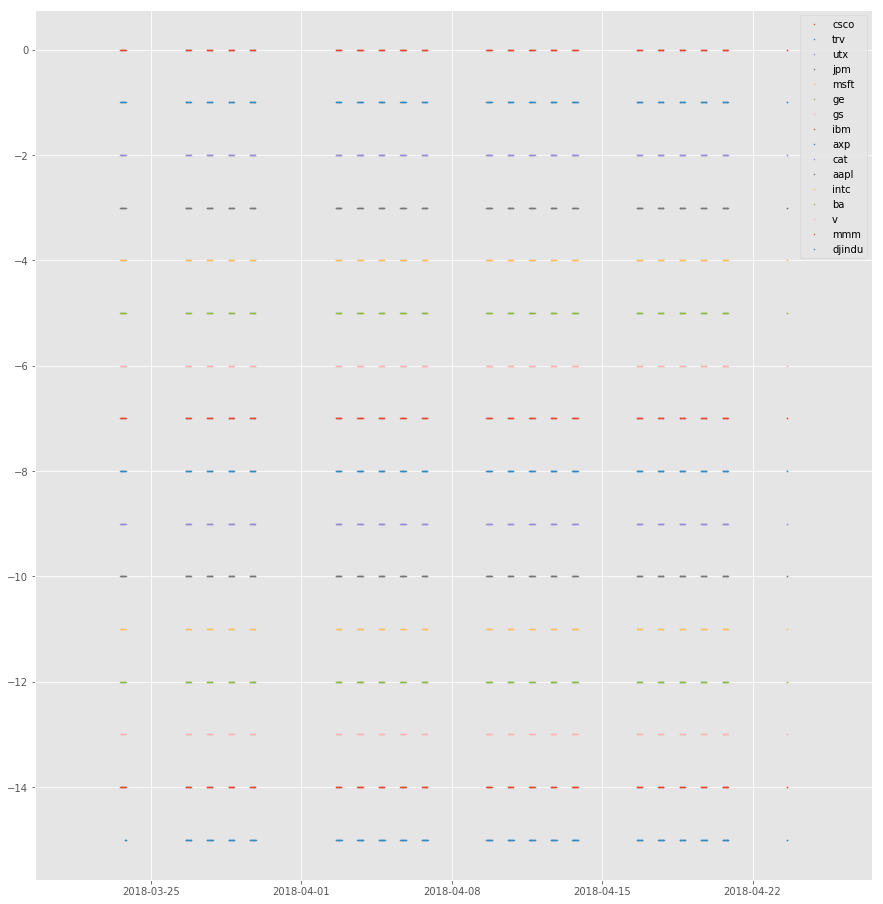

In [20]:
# view timeseries
plt.figure(figsize=(15,16))
for i, d in enumerate(dfs1):
    name = d.name
    x=d.dropna().index
    y=[-i]*len(x)
    plt.scatter(x,y,label=name[:20], s=1)
plt.legend()

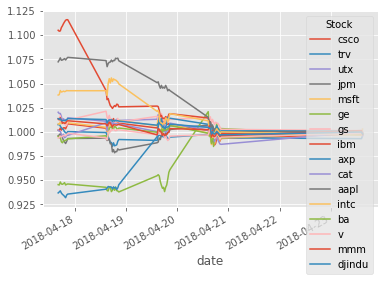

In [21]:
# View one day, normalized
data_window = df[200:300].copy()
open = data_window.xs('open', axis=1, level='Price')
data_window = data_window.divide(open.iloc[-1], level='Stock')
data_window = data_window.drop('open', axis=1, level='Price')
data_window.xs('close', axis=1, level='Price').plot()
plt.savefig('normalised_data_plot.png', bbox_inches = 'tight', dpi = 800)

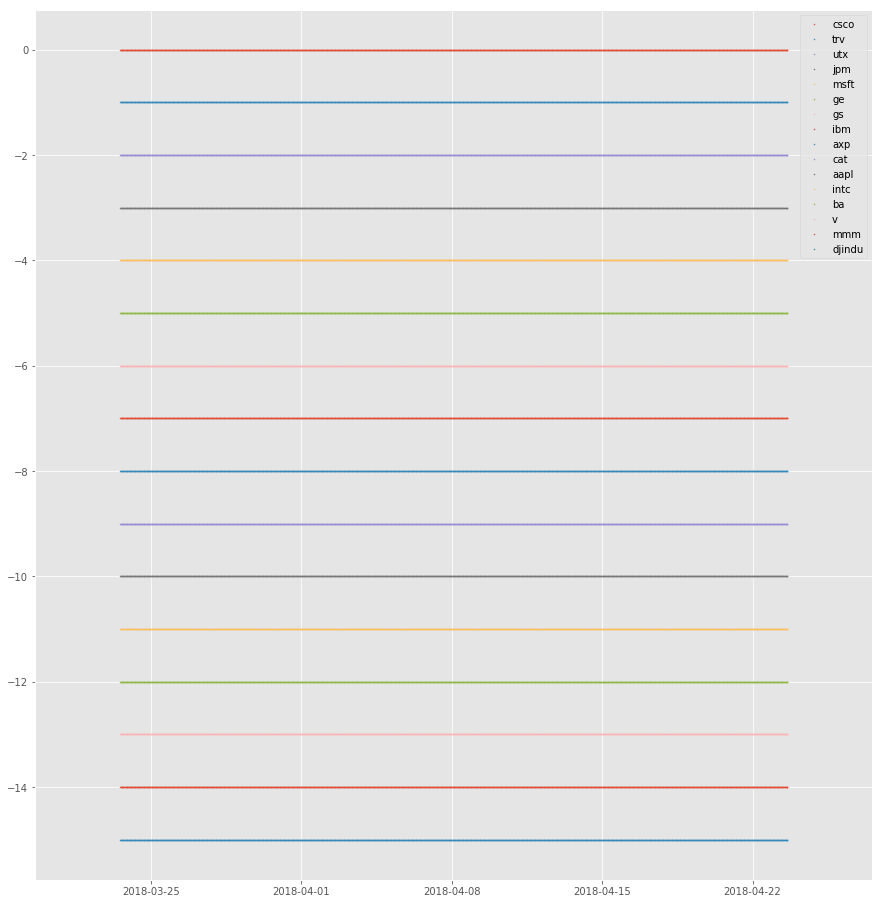

In [22]:
# view timeseries
plt.figure(figsize=(15,16))
for i, d in enumerate(dfs):
    name = d.name
    x=d.dropna().index
    y=[-i]*len(x)
    plt.scatter(x,y,label=name[:20], s=1)
plt.legend()

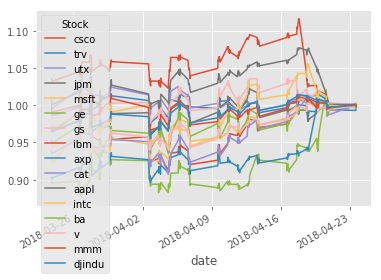

In [23]:
# View one day, normalized
data_window = df[0:30000].copy()
open = data_window.xs('open', axis=1, level='Price')
data_window = data_window.divide(open.iloc[-1], level='Stock')
data_window = data_window.drop('open', axis=1, level='Price')
data_window.xs('close', axis=1, level='Price').plot()